# Introduction
This file shows how much alcohol is consumed by people of various countries around the world. There are many substances that lies in the category of alcohol. In this dataset, only beer, spirit and wine are taken into consideration.

 * *Country*: Country in question.
 * *Servings*: is the amount of servings of alcoholic beverages consumed annually, there are three: beer, spirit, wine.
 * *Total liters of alcohol*: Represents in liters the total amount of the three beverages consumed annually.

On the other hand, I was forced to look up on the internet what exactly is a 'serving' and, according to:

https://datahub.io/five-thirty-eight/alcohol-consumption

It is a measure called *Average serving sizes per person*, which I will abbreviate as AVGSP from now on.

# Load dataset and check basic info

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("alcohol-consumption-all-over-the-world.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


# Exploratory data analysis

Let's see graphically the total amount of alcoholic servings worldwide. For this we will use a boxplot with which we will have useful information such as the mean, standard deviation, quantiles, and outliers among others... we will also combine it with a swarmplot just to improve the visual details.

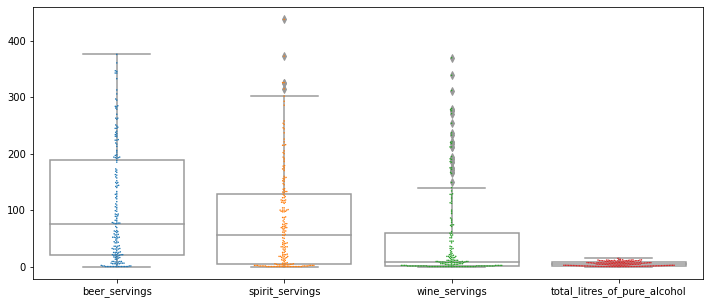

In [ ]:
plt.subplots(figsize=(12,5))
sns.boxplot(data=df, color='white')
sns.swarmplot(data=df, size=1.5)
plt.show()

Analytically this is

In [ ]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


Let's look at the distribution of annual alcohol consumption in all countries

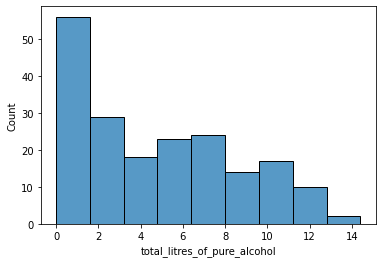

In [ ]:
sns.histplot(data=df, x="total_litres_of_pure_alcohol")
plt.show()

It seems to have asymmetry, let's look at this analytically.

In [ ]:
df["total_litres_of_pure_alcohol"].skew()

0.42870418979394703

As a general rule if the asymmetry is in the range of (-0.50, 0.50) we can say that it is in a moderate value. Therefore I will not apply any kind of transformation, this information will be useful later on.

# Servings and total litres of alcohol by countries

First let's check this analytically, for this we will apply an algorithm of type *sort* to sort the data by quantity. Let's do it for *total litres of pure alcohol*, *beer servings*, *spirit servings* and *wine servings*.

Lets begin with *total litres of pure alcohol*:

In [ ]:
df_total_alcohol= df[['country', 'total_litres_of_pure_alcohol']].sort_values(by=['total_litres_of_pure_alcohol'], ascending=False)
df_total_alcohol.head()

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8


Plotting the information

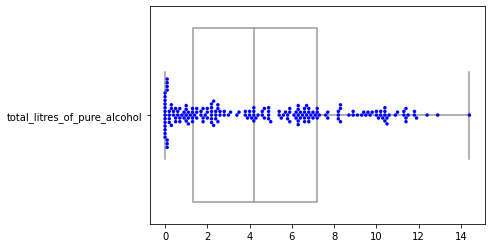

In [ ]:
sns.boxplot(data=df_total_alcohol, orient='h', color='white')
sns.swarmplot(data=df_total_alcohol, orient='h', color='blue', size=3.5)
plt.show()

Analytically.

In [ ]:
df_total_alcohol.describe()

,total_litres_of_pure_alcohol
count,193.000000
mean,4.717098
std,3.773298
min,0.000000
25%,1.300000
50%,4.200000
75%,7.200000
max,14.400000


Now we will do the same analysis for *beer servings*:

In [ ]:
df_beer= df[['country', 'beer_servings']].sort_values(by=['beer_servings'], ascending=False)
df_beer.head()

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343


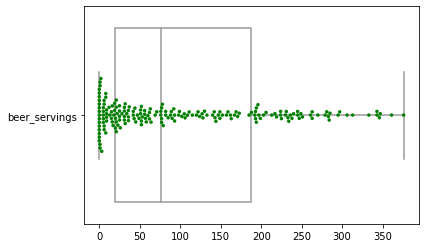

In [ ]:
sns.boxplot(data=df_beer, orient='h', color='white')
sns.swarmplot(data=df_beer, orient='h', color='green', size=3.5)
plt.show()

Same analysis, but this time for *spirit servings*:

In [ ]:
df_spirit= df[['country', 'spirit_servings']].sort_values(by=['spirit_servings'], ascending=False)
df_spirit.head()

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315


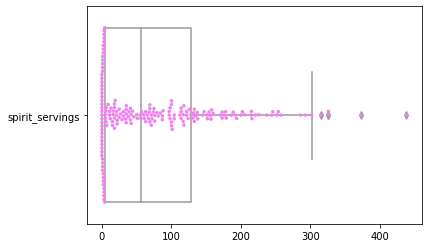

In [ ]:
sns.boxplot(data=df_spirit, orient='h', color='white')
sns.swarmplot(data=df_spirit, orient='h', color='violet', size=3.5)
plt.show()

Finally is the time for *wine servings*:

In [ ]:
df_wine= df[['country', 'wine_servings']].sort_values(by=['wine_servings'], ascending=False)
df_wine.head()

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278


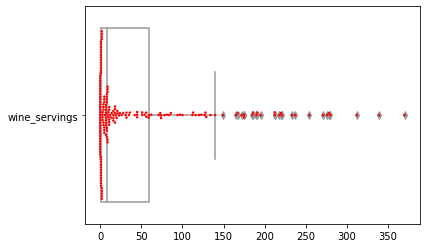

In [ ]:
sns.boxplot(data=df_wine, orient='h', color='white')
sns.swarmplot(data=df_wine, orient='h', color='red', size=2.5)
plt.show()

# Alcohol-servings sorted for all countries

In the previous section we made an individual analysis for each type of alcoholic portion, and we also ordered the data from highest to lowest.

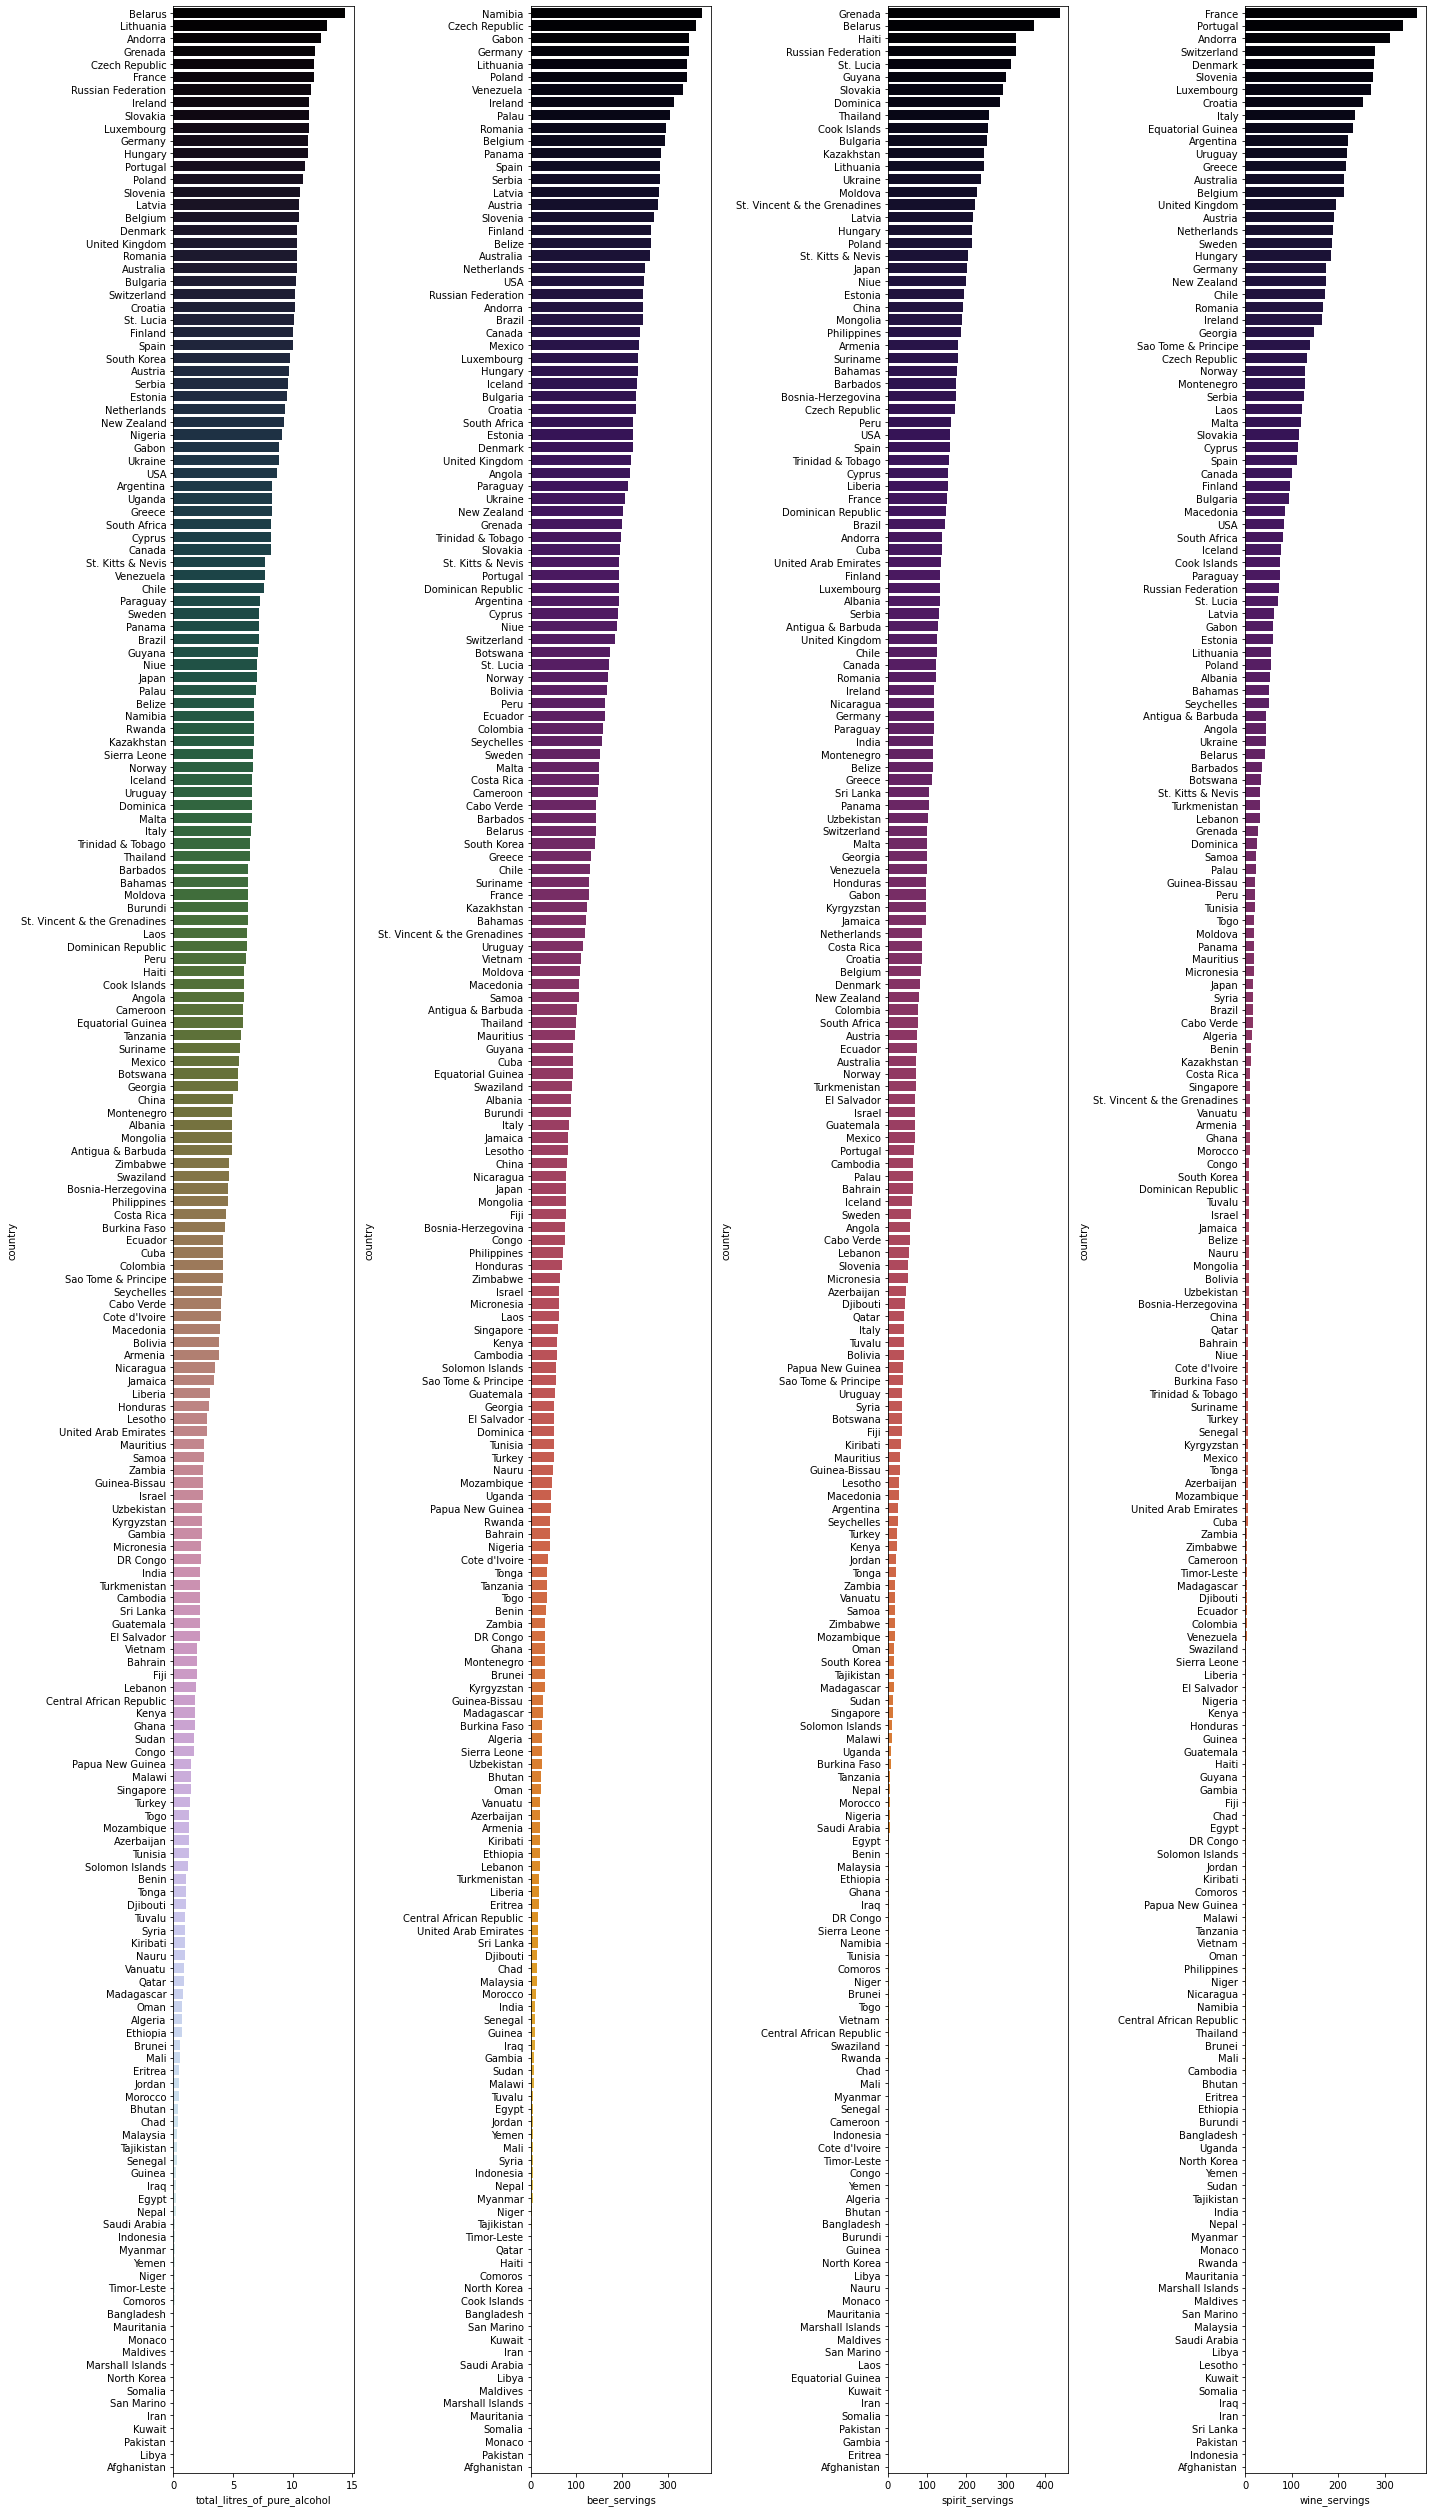

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,35))
sns.barplot(data=df_total_alcohol, x='total_litres_of_pure_alcohol', y='country', palette='cubehelix', ax=axs[0])
sns.barplot(data=df_beer, x='beer_servings', y='country', palette='inferno', ax=axs[1])
sns.barplot(data=df_spirit, x='spirit_servings', y='country', palette='inferno', ax=axs[2])
sns.barplot(data=df_wine, x='wine_servings', y='country', palette='inferno', ax=axs[3])
plt.tight_layout()
plt.show()

*In the following section we will calculate two cases in which the measures will represent the consumption per country, although they will try to express the same thing, the reasoning of the results will have different conclusions.*

# Most porcentual representative countries in alcohol consumption around the maximum.

This value will be the country with the highest consumption, then we will calculate the ratio of all the other countries around this value.

In [ ]:
def get_max_lts():
  max = 0
  for lts in df['total_litres_of_pure_alcohol']:
    if lts > max:
      max = lts
  return max

df['total_alcohol_percent_by_max'] = df['total_litres_of_pure_alcohol'] / get_max_lts() * 100

df_total_alc_per= df[['country', 'total_alcohol_percent_by_max']].sort_values(by=['total_alcohol_percent_by_max'], ascending=False)
#df_total_alc_per['id']= np.arange(0, df_total_alc_per.shape[0])
df_total_alc_per.reset_index(inplace=True)
df_total_alc_per[['country', 'total_alcohol_percent_by_max']].head()

,country,total_alcohol_percent_by_max
0,Belarus,100.000000
1,Lithuania,89.583333
2,Andorra,86.111111
3,Grenada,82.638889
4,Czech Republic,81.944444


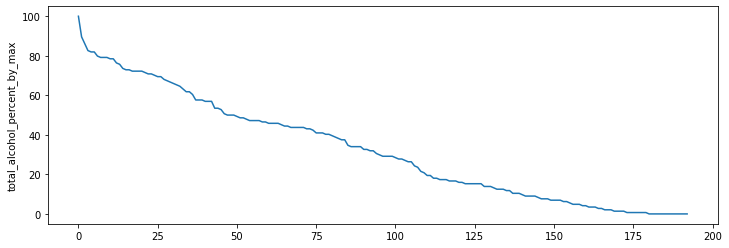

In [ ]:
plt.subplots(figsize=(12,4))
sns.lineplot(data=df_total_alc_per, x=df_total_alc_per.index, y="total_alcohol_percent_by_max")
plt.show()

Now let's see which countries are above 50% alcohol consumption, then we will repeat the opposite logic. That is, we take this value as the inflection point.

**Countries with an annual alcohol consumption above 50%.**

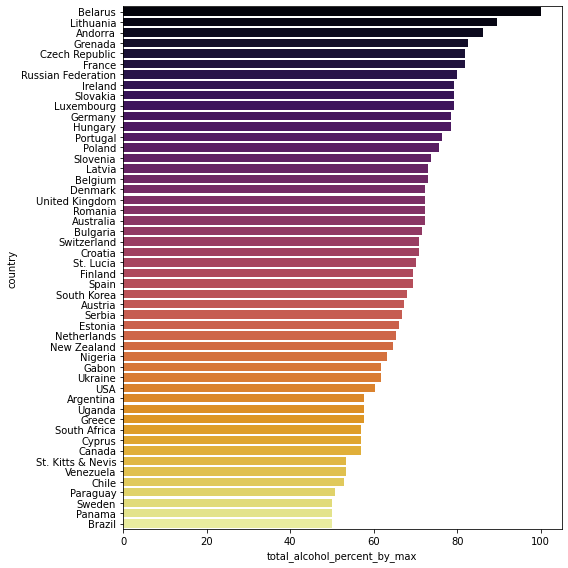

In [ ]:
df_total_alc_upper50 = df_total_alc_per[df_total_alc_per['total_alcohol_percent_by_max'] >= 50]

plt.subplots(figsize=(8,8))
sns.barplot(data=df_total_alc_upper50, x='total_alcohol_percent_by_max', y='country', palette='inferno')
plt.tight_layout()
plt.show()

**Countries with an annual alcohol consumption of less than 50%.**

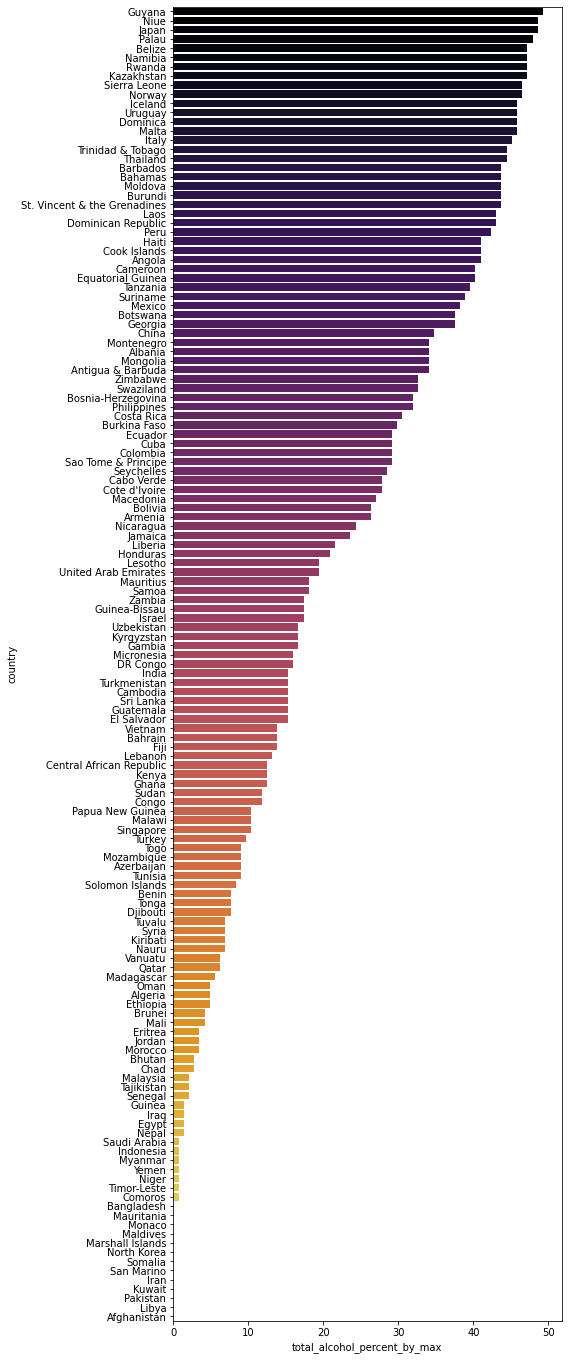

In [ ]:
df_total_alc_down50 = df_total_alc_per[df_total_alc_per['total_alcohol_percent_by_max'] < 50]

plt.subplots(figsize=(8,19))
sns.barplot(data=df_total_alc_down50, x='total_alcohol_percent_by_max', y='country', palette='inferno')
plt.tight_layout()
plt.show()

# Separating consumption around the annual average

Because the mean is a central value we know that it is highly influenced by the countries with the highest alcohol consumption and at the same time with those that have the least (our graphical analysis showed that this is the case, and that the increase is progressive), on the other hand, for real reasons it would not make sense to search for and eliminate outliers since they are values that are not related to each other, they do not follow an increase or decrease because they are of the same category (rather different categories i.e. countries), and even if this relationship existed it would not imply causality.

It would not make sense to normalize or filter outliers from our dataset and "force" it to be around an average, there are real reasons (which are beyond the scope of this analysis) why some countries have a greater presence of alcohol consumption than others, we also do not have dates from previous years to conclude "atypical years" and look for an overall average in years.

In [ ]:
alc_mean = df['total_litres_of_pure_alcohol'].mean()

**Separating countries with higher and lower than average annual alcohol consumption**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


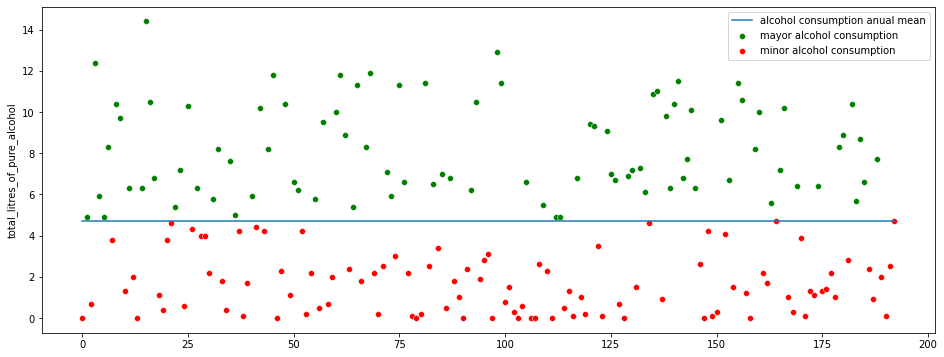

In [ ]:
plt.subplots(figsize=(16, 6))
#df1 = df[df['total_alcohol_mean'] > alc_mean]
#df2 = df[df['total_alcohol_mean'] < alc_mean]
#sns.scatterplot(data=df1, y='total_alcohol_mean', x=df1.index, color='green', label='mayor alcohol consumption')
#sns.scatterplot(data=df2, y='total_alcohol_mean', x=df2.index, color='red', label='minor alcohol consumption')

df1 = df[df['total_litres_of_pure_alcohol'] > alc_mean]
df2 = df[df['total_litres_of_pure_alcohol'] < alc_mean]
sns.scatterplot(data=df1, y='total_litres_of_pure_alcohol', x=df1.index, color='green', label='mayor alcohol consumption')
sns.scatterplot(data=df2, y='total_litres_of_pure_alcohol', x=df2.index, color='red', label='minor alcohol consumption')

x_lin = np.arange(0, df.shape[0])
y_lin = [alc_mean for i in range(df.shape[0])]
sns.lineplot(x_lin, y_lin, label='alcohol consumption anual mean')

plt.show()

**Total annual consumption**

In [ ]:
print(np.round(df['total_litres_of_pure_alcohol'].sum(), 2), 'Lts')

910.4 Lts


Summary

1. Most representative value (maximum): countries around a maximum measure of consumption.
2. Central value: average annual consumption in the world, those values exceeding this average will be above.

# Correlations

**In this dataset, it does not make sense to look for correlations since the consumption of one beverage does not necessarily influence the other.**

I mean, the fact of consuming spirit does not influence the amount of wine consumed and, following the same logic for all drinks (and the total annual lts) even if there were apparent correlations these would lack real and true sense, here is the premise of basic statistics: **correlation does not necessarily imply causation**.

# Calculation of alcohol consumption.

**ABV(alcohol by volume) is a standard measure of how much alcohol (ethanol) is contained in a given volume of an alcoholic beverage (expressed as a volume percent).**

Now we just need to convert the portions of our dataset to the following measurements:

*   Beer: 4–6%
*   Neutral grain spirit: 85–95%
*   Wine: 5.5–16% (most often 12.5–14.5%)

*Reference*: https://en.wikipedia.org/wiki/Alcohol_by_volume

**Liters of alcohol in portions**.

At the beginning we saw that the servings were expressed in something called AVGSP.
However now we are interested in expressing the amount of liters of alcohol in each average serving size, for this I came up with a measure which I will call *LAVGSP* or "Litres of average serving size per person".

Formula.

**LAVGSP** = **AVGSP**(*Average serving size per person*) * **LtsA**(*Liters of pure alcohol*)

As ABV is a percentage measure and we need liters, dividing by 100 will give us the actual proportion of liters of pure alcohol. Then by standardizing the portions with the measures described above we will have (I will take the following ranges):

*   Beer= 0.06 [Lts of pure alcohol]
*   Spirit= 0.85 [Lts of pure alcohol]
*   Wine=0.125 [Lts of pure alcohol]


In [ ]:
df_alc = pd.DataFrame()
df_alc['country'] = df['country']
df_alc['beer_lts_in_servings'] = 0.06 * df['beer_servings']
df_alc['spirit_lts_in_servings'] = 0.85 * df['spirit_servings']
df_alc['wine_lts_in_servings'] = 0.125 * df['wine_servings']

df_alc['total_lts_in_servings'] = df_alc['beer_lts_in_servings'] + df_alc['spirit_lts_in_servings'] + df_alc['wine_lts_in_servings']
df_alc

,country,beer_lts_in_servings,spirit_lts_in_servings,wine_lts_in_servings,total_lts_in_servings
0,Afghanistan,0.00,0.00,0.000,0.000
1,Albania,5.34,112.20,6.750,124.290
2,Algeria,1.50,0.00,1.750,3.250
3,Andorra,14.70,117.30,39.000,171.000
4,Angola,13.02,48.45,5.625,67.095
...,...,...,...,...,...
188,Venezuela,19.98,85.00,0.375,105.355
189,Vietnam,6.66,1.70,0.125,8.485
190,Yemen,0.36,0.00,0.000,0.360
191,Zambia,1.92,16.15,0.500,18.570


For the next section we will need the **pycountry_convert** library, if we don't have it we can install it by running:

In [ ]:
!pip install pycountry_convert

We assign to which continent each country corresponds

In [ ]:
import pycountry_convert as pc

In [ ]:
def countries_to_continents():
  countries = []
  continents = {
      'NA': 'North America',
      'SA': 'South America', 
      'AS': 'Asia',
      'OC': 'Australia',
      'AF': 'Africa',
      'EU': 'Europe'
  }
  others = {"Antigua & Barbuda": 'North America',
            "Bosnia-Herzegovina" : 'Europe',
            # Ivory Coast
            "Cote d'Ivoire": 'Africa',
            "DR Congo" : 'Africa',
            "St. Kitts & Nevis" : 'North America',
            "St. Vincent & the Grenadines" : 'North America',
            "Sao Tome & Principe" : 'Africa',
            "Timor-Leste" : 'Asia',
            "Trinidad & Tobago" : 'South America'}
  for c in df['country'].values:
    if c in others.keys():
      countries.append(others[c])
    else:
      country_code = pc.country_name_to_country_alpha2(c, cn_name_format="default")
      countries.append(continents[pc.country_alpha2_to_continent_code(country_code)])
  
  return countries

df_alc['continent'] = countries_to_continents()
df_alc.head()

,country,beer_lts_in_servings,spirit_lts_in_servings,wine_lts_in_servings,total_lts_in_servings,continent
0,Afghanistan,0.00,0.00,0.000,0.000,Asia
1,Albania,5.34,112.20,6.750,124.290,Europe
2,Algeria,1.50,0.00,1.750,3.250,Africa
3,Andorra,14.70,117.30,39.000,171.000,Europe
4,Angola,13.02,48.45,5.625,67.095,Africa


**Total alcohol consumed of each beverage by continent**. Beer, Spirit and Wine

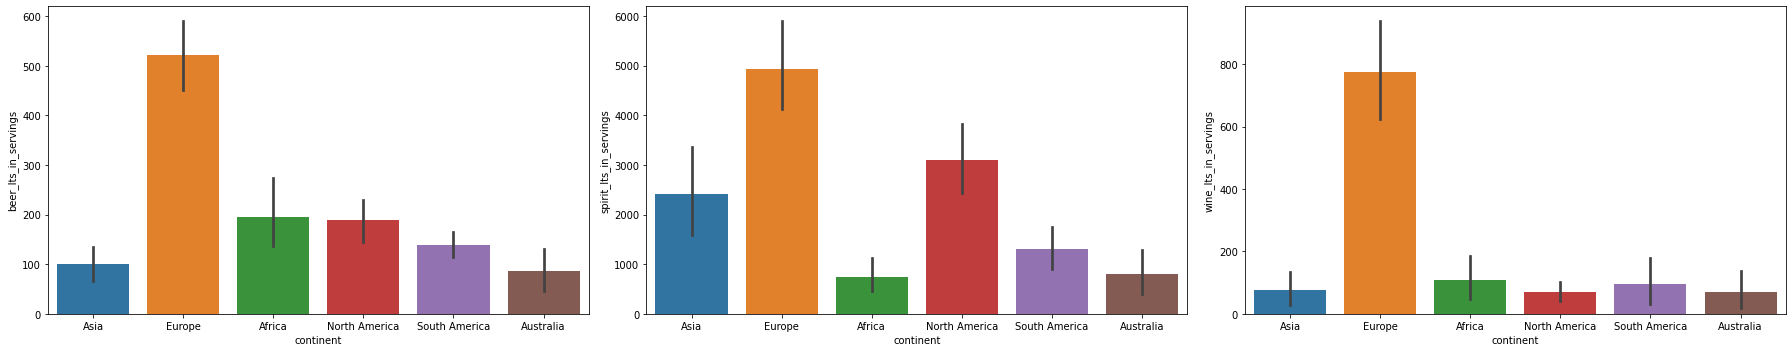

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
sns.barplot(data=df_alc, x='continent', y='beer_lts_in_servings', estimator=sum, ax=axs[0])
sns.barplot(data=df_alc, x='continent', y='spirit_lts_in_servings', estimator=sum, ax=axs[1])
sns.barplot(data=df_alc, x='continent', y='wine_lts_in_servings', estimator=sum, ax=axs[2])
plt.tight_layout()
plt.show()

**Total alcohol consumed by continent**

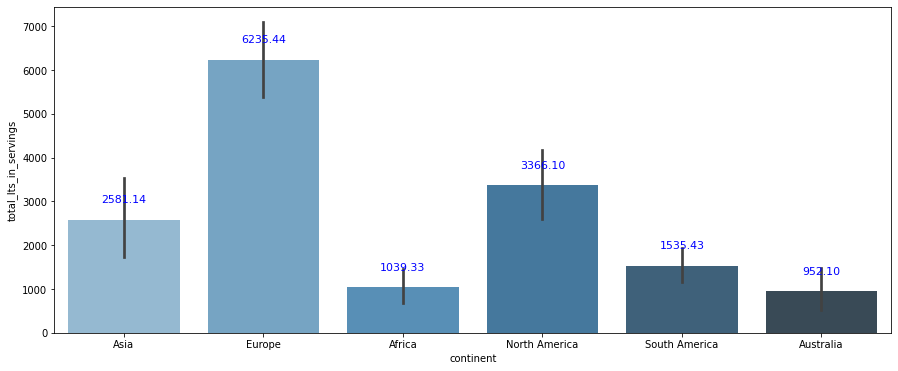

In [ ]:
plt.subplots(figsize=(15, 6))
g = sns.barplot(data=df_alc, x='continent', y='total_lts_in_servings', palette='Blues_d', estimator=sum)

for p in g.patches:
  g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='blue', xytext=(0, 20), textcoords='offset points')
plt.show()

Let's join the American(North + South) continent and repeat the logic of the last analysis.

In [ ]:
def get_america_continent(row):
  if row['continent'] == 'North America' or row['continent'] == 'South America':
    row['continent'] = 'America'
  return row

df_alc = df_alc.apply(lambda x: get_america_continent(x), axis=1)

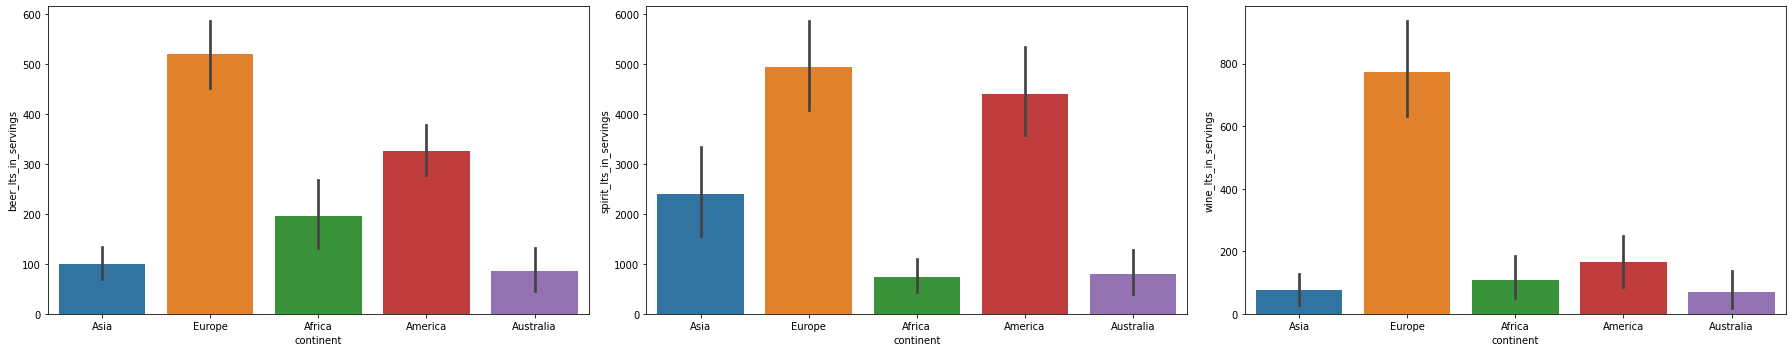

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
sns.barplot(data=df_alc, x='continent', y='beer_lts_in_servings', estimator=sum, ax=axs[0])
sns.barplot(data=df_alc, x='continent', y='spirit_lts_in_servings', estimator=sum, ax=axs[1])
sns.barplot(data=df_alc, x='continent', y='wine_lts_in_servings', estimator=sum, ax=axs[2])
plt.tight_layout()
plt.show()

Total alcohol consumed

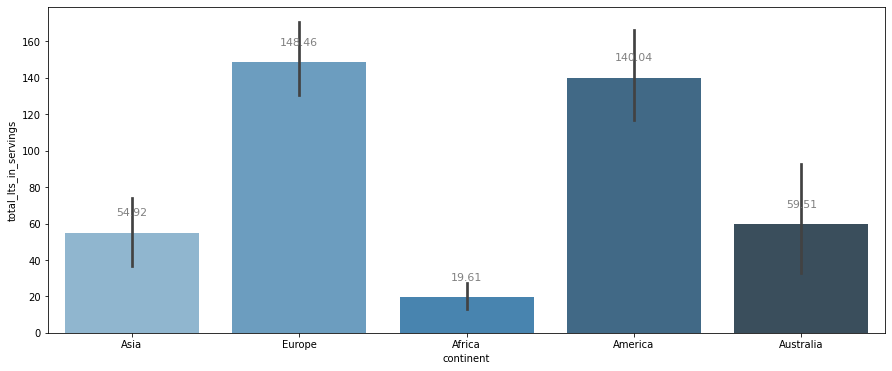

In [ ]:
plt.subplots(figsize=(15, 6))
g = sns.barplot(data=df_alc, x='continent', y='total_lts_in_servings', palette='Blues_d')

for p in g.patches:
  g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
             textcoords='offset points')
plt.show()

Top consuming countries by continent

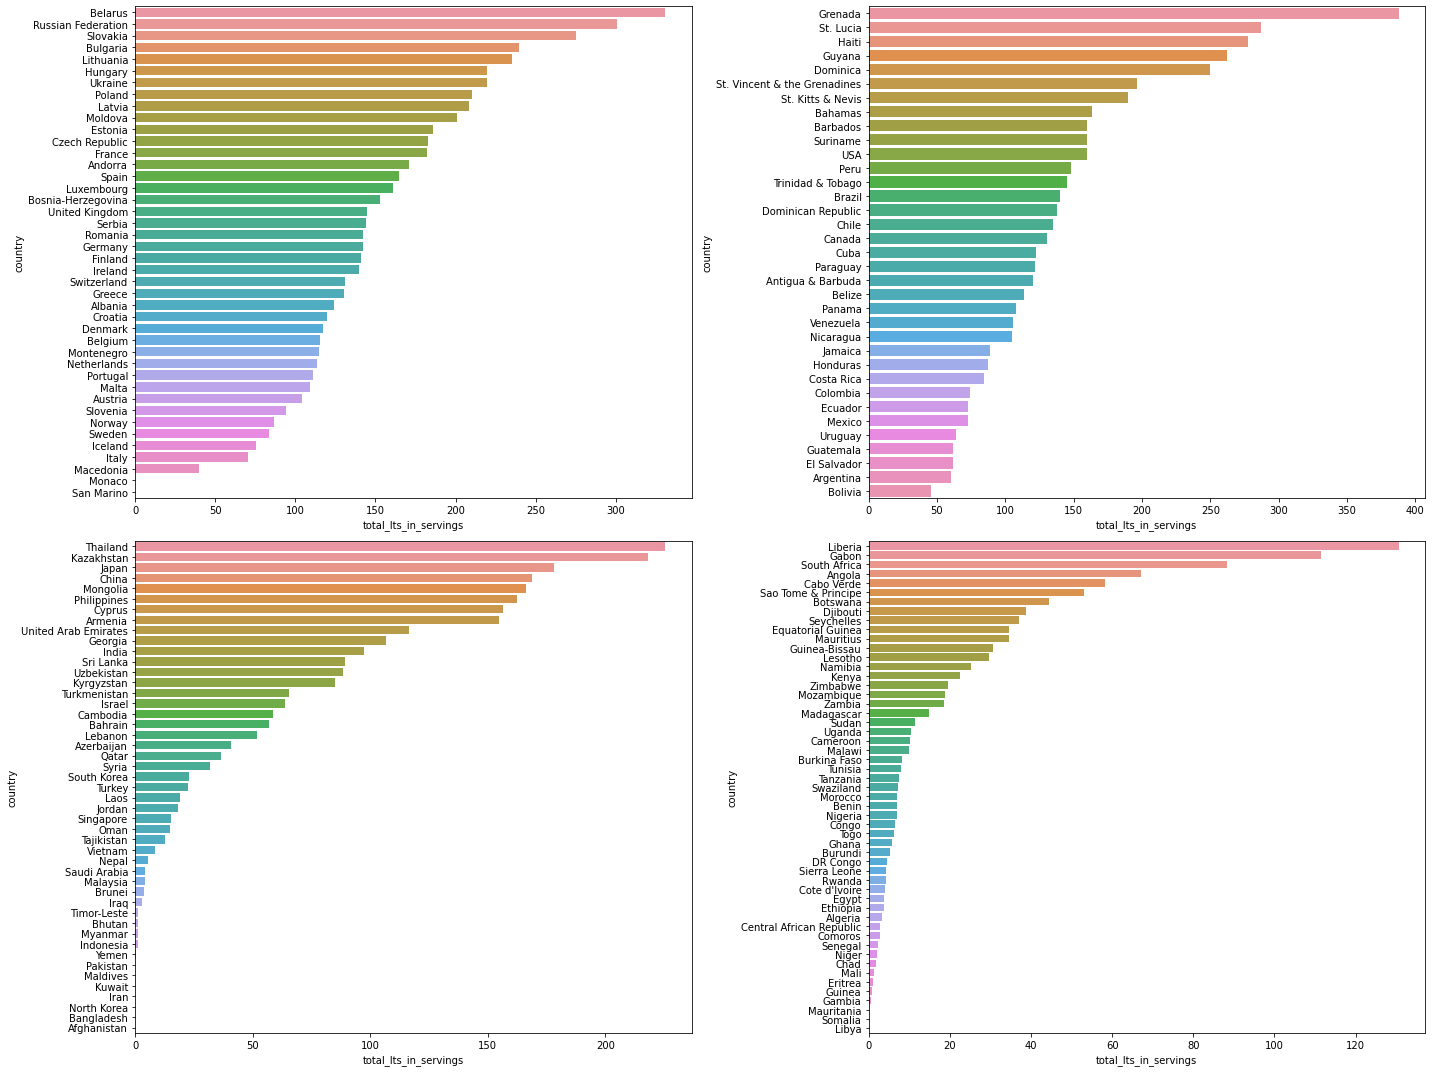

In [ ]:
_, axs= plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
sns.barplot(data=df_alc.loc[df_alc['continent'] == 'Europe'][['country', 'total_lts_in_servings']].sort_values(by=['total_lts_in_servings'], ascending=False), y='country', x='total_lts_in_servings', ax=axs[0][0])
sns.barplot(data=df_alc.loc[df_alc['continent'] == 'America'][['country', 'total_lts_in_servings']].sort_values(by=['total_lts_in_servings'], ascending=False), y='country', x='total_lts_in_servings', ax=axs[0][1])
sns.barplot(data=df_alc.loc[df_alc['continent'] == 'Asia'][['country', 'total_lts_in_servings']].sort_values(by=['total_lts_in_servings'], ascending=False), y='country', x='total_lts_in_servings', ax=axs[1][0])
sns.barplot(data=df_alc.loc[df_alc['continent'] == 'Africa'][['country', 'total_lts_in_servings']].sort_values(by=['total_lts_in_servings'], ascending=False), y='country', x='total_lts_in_servings', ax=axs[1][1])
plt.tight_layout()
plt.show()

Conclusion:
  * The European continent is the definitive consumer of alcoholic beverages.
  * America is the second largest consumer of alcohol and North America is the second largest consumer of spirits.
  * Africa is the least drinker

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

In [ ]:
def get_countries_utils(df_alc):
  geolocator = Nominatim()
  def geo_locate(country):
    # Generic code from internet
    try:
      # Geolocate the center of the country
      loc = geolocator.geocode(country)
      # And return latitude and longitude
      return (loc.latitude, loc.longitude)
    except:
      # Return missing value
      return np.nan
  
  def get_max_lts(lts_in_countries):
    max = 0
    for lts in lts_in_countries:
      if lts > max:
        max = lts
    return max

  d = []
  max_lts = get_max_lts(df_alc['total_lts_in_servings'])
  data = df_alc[['country', 'total_lts_in_servings']]
  
  for i, c in data.iterrows():
    d.append((c[0], geo_locate(c[0]), c[1]/max_lts))

  return d

countries_coords = get_countries_utils(df_alc)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

max_radius=15
for c in countries_coords:
  folium.CircleMarker(location = c[1], radius=max_radius * c[2], popup= folium.Popup(c[0]+' '+str(c[2])), opacity=c[2], fill=True).add_to(marker_cluster)

world_map